In [1]:
import os
import matplotlib.lines as mlines
from df_utils import create_df, create_sparse_df_pointing
from plot_utils import plot_success_rate, plot_fittslaw, plot_task_completion_time_pointing, plot_deviation_count, plot_end_point_dist
import pandas as pd

In [2]:
effort_models = ["zero_effort", "dc_effort_w1", "jac_effort_w1", "ctc_effort_w1", "armmovementpaper_effort"]

alphas = {"no": 0.3, "hit": 1.0}
colors = {
    'dist': 'r', 
    'zero': 'g' 
}
markers = {"no_bonus": "+", "hit_bonus": "o"}

In [3]:
effort_names = ["Zero", "DC", "JAC", "CTC", "EJK"]
legend_handles = [
    mlines.Line2D([0], [0], color=colors['dist'], lw=4, label='absolute distance'),
    mlines.Line2D([0], [0], color=colors['zero'], lw=4, label='no distance'),
    mlines.Line2D([0], [0], marker='o', color='black', markersize=8, label='with bonus', lw=0),
    mlines.Line2D([0], [0], marker='+', color='black', markersize=8, label='without bonus', lw=0)
]

In [4]:
#read data
folder = os.path.abspath(f"../../simulators/")

data_df_1, number_of_episodes = create_df(["no_bonus"], ["zero_effort"], ["dist"], folder, run_nr=1, task = "pointing")
data_df_2, number_of_episodes = create_df(["hit_bonus"], effort_models, ["dist"], folder, run_nr=1, task = "pointing")
sparse_data_df = create_sparse_df_pointing(effort_models, folder, run_nr=1)

all_combined_df = pd.concat([sparse_data_df, data_df_1, data_df_2])

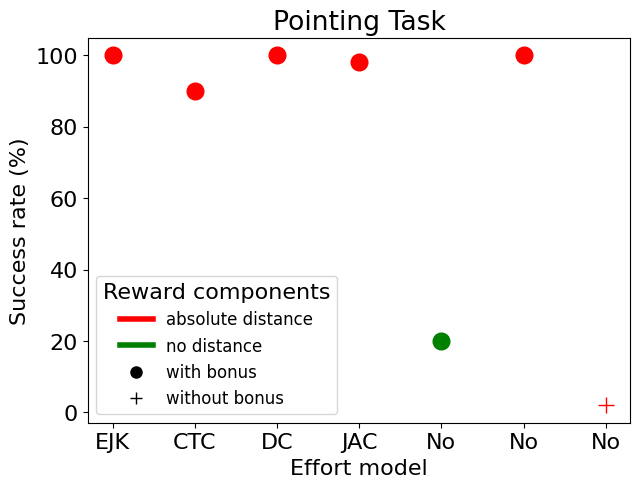

In [5]:
plot_success_rate('pointing',"success_rate_pointing", legend_handles, colors, markers, all_combined_df)

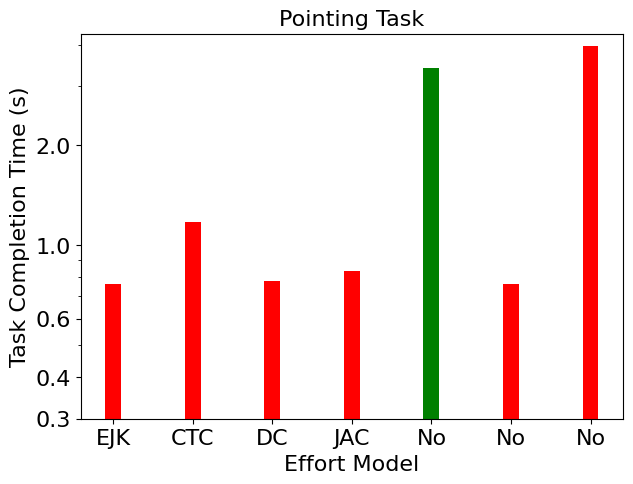

In [6]:
plot_task_completion_time_pointing(all_combined_df, colors)

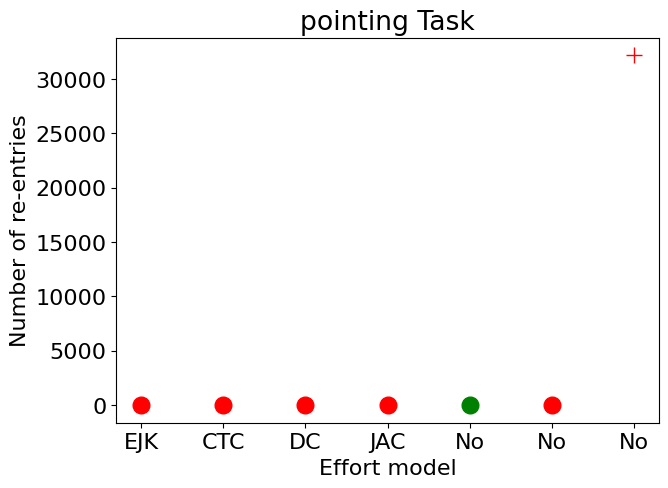

In [7]:
plot_deviation_count("pointing", "deviation_count_pointing", colors, markers, all_combined_df)

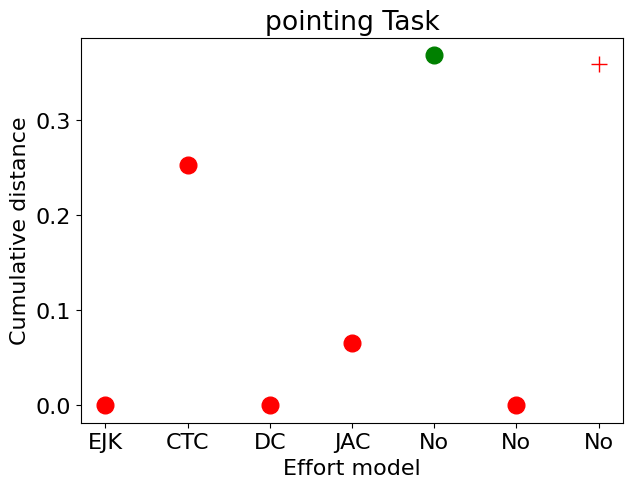

In [8]:
plot_end_point_dist("pointing", "cumulative_distance_pointing", colors, markers, all_combined_df)